We start by importing a few standard packages that we always use

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import rdkit
print(rdkit.__version__)

2021.09.1b1


In [2]:
# Use Schrodinger's open-source coordgen library as our default engine 
# for creating molecular coordinates
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)

# Reading molecules

Probably the most fundamental type to understand when using the RDKit is the molecule type.

Let's start with how to create new molecules.

In [3]:
doravirine = Chem.MolFromMolFile('./data/doravirine.mol')

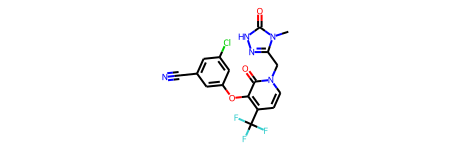

In [4]:
doravirine

When the last entry in a notebook cell is an RDKit molecule, the RDKit shows you an image of the molecule.

Here's the actual type:

In [5]:
type(doravirine)

rdkit.Chem.rdchem.Mol

We can also create molecules from SMILES:

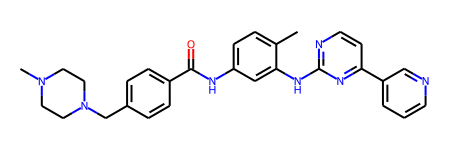

In [6]:
imatinib = Chem.MolFromSmiles('Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc(-c2cccnc2)n1')
imatinib

Before moving on, it makes sense to take a look at how errors are handled:

In [7]:
m = Chem.MolFromSmiles('CCO(CC)CC')

RDKit ERROR: [06:03:21] Explicit valence for atom # 2 O, 3, is greater than permitted
[06:03:21] Explicit valence for atom # 2 O, 3, is greater than permitted


In [8]:
m is None

True

It is possible to disable sanitization, but you get back a molecule which may have terrible chemistry problems and which is certainly missing a lot of useful calculated properties.

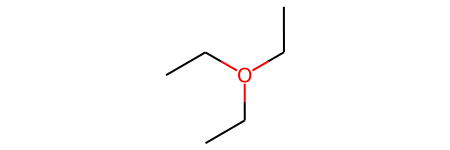

In [9]:
m = Chem.MolFromSmiles('CCO(CC)CC',sanitize=False)
m

Or we can read sets of molecules using a supplier.

In [10]:
suppl = Chem.SmilesMolSupplier('./data/zinc_bbs.small.smi',delimiter=',')
bbs = [x for x in suppl if x is not None]  #<- notice that we are filtering out molecules which have sanitization problems
len(bbs)

5000

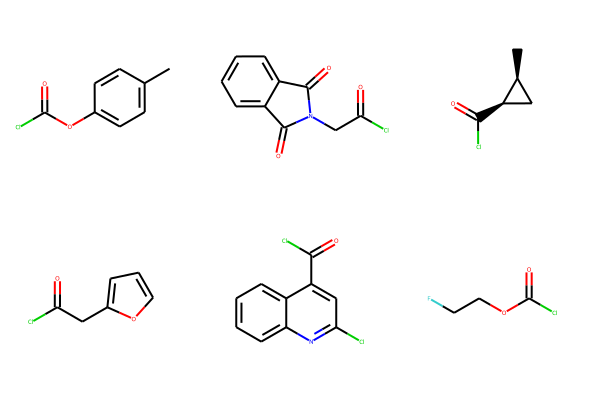

In [11]:
Draw.MolsToGridImage(bbs[:6])

In [12]:
bb = bbs[0]
bb.GetPropsAsDict()

{'SlogP': 2.7326200000000007,
 'TPSA': 26.3,
 'AMW': 170.59500000000003,
 'NumRotatableBonds': 1,
 'NumHBD': 0,
 'NumHBA': 2,
 'NumHeavyAtoms': 11,
 'NumStereocenters': 0,
 'NumUnspecifiedStereocenters': 0}

In [13]:
bb.GetProp('NumHBD'),bb.GetIntProp('NumHBD')

('0', 0)

In [14]:
bb.GetDoubleProp('AMW')

170.59500000000003

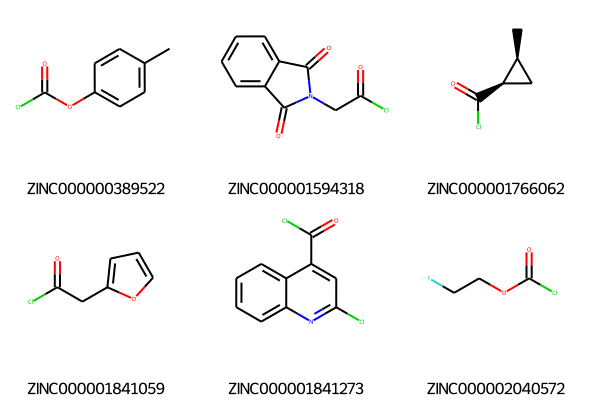

In [15]:
Draw.MolsToGridImage(bbs[:6],legends=[x.GetProp('_Name') for x in bbs])

# Basic molecule manipulations

By default molecules do not have explicit hydrogens in the graph and any explicit Hs in the input are removed.

In [16]:
m = Chem.MolFromSmiles('CO')
m.Debug()

Atoms:
	0 6 C chg: 0  deg: 1 exp: 1 imp: 3 hyb: 4 arom?: 0 chi: 0
	1 8 O chg: 0  deg: 1 exp: 1 imp: 1 hyb: 4 arom?: 0 chi: 0


RDKit INFO: Atoms:
RDKit INFO: 	0 6 C chg: 0  deg: 1 exp: 1 imp: 3 hyb: 4 arom?: 0 chi: 0
RDKit INFO: 	1 8 O chg: 0  deg: 1 exp: 1 imp: 1 hyb: 4 arom?: 0 chi: 0
RDKit INFO: Bonds:
RDKit INFO: 	0 0->1 order: 1 conj?: 0 aromatic?: 0


Bonds:
	0 0->1 order: 1 conj?: 0 aromatic?: 0


In [17]:

mb = '''
  Mrv2102 10182112293D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 6 5 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C 1.41 0.0013 0.0022 0
M  V30 2 O -0.0111 -0.0097 -0.0168 0
M  V30 3 H 1.7704 1.03 0.0043 0
M  V30 4 H 1.7817 -0.5105 -0.8842 0
M  V30 5 H 1.7704 -0.5112 0.8942 0
M  V30 6 H -0.2781 0.4621 0.8004 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 1 3
M  V30 3 1 1 4
M  V30 4 1 1 5
M  V30 5 1 2 6
M  V30 END BOND
M  V30 END CTAB
M  END
'''
m = Chem.MolFromMolBlock(mb)
m.Debug()

RDKit INFO: Atoms:
RDKit INFO: 	0 6 C chg: 0  deg: 1 exp: 1 imp: 3 hyb: 4 arom?: 0 chi: 0
RDKit INFO: 	1 8 O chg: 0  deg: 1 exp: 1 imp: 1 hyb: 4 arom?: 0 chi: 0
RDKit INFO: Bonds:
RDKit INFO: 	0 0->1 order: 1 conj?: 0 aromatic?: 0


Atoms:
	0 6 C chg: 0  deg: 1 exp: 1 imp: 3 hyb: 4 arom?: 0 chi: 0
	1 8 O chg: 0  deg: 1 exp: 1 imp: 1 hyb: 4 arom?: 0 chi: 0
Bonds:
	0 0->1 order: 1 conj?: 0 aromatic?: 0


The removal of Hs can be turned off (often relevant when working with 3D structures):

In [18]:
m2 = Chem.MolFromMolBlock(mb,removeHs=False)
m2.Debug()

Atoms:
	0 6 C chg: 0  deg: 4 exp: 4 imp: 0 hyb: 4 arom?: 0 chi: 0
	1 8 O chg: 0  deg: 2 exp: 2 imp: 0 hyb: 4 arom?: 0 chi: 0
	2 1 H chg: 0  deg: 1 exp: 1 imp: 0 hyb: 1 arom?: 0 chi: 0
	3 1 H chg: 0  deg: 1 exp: 1 imp: 0 hyb: 1 arom?: 0 chi: 0
	4 1 H chg: 0  deg: 1 exp: 1 imp: 0 hyb: 1 arom?: 0 chi: 0
	5 1 H chg: 0  deg: 1 exp: 1 imp: 0 hyb: 1 arom?: 0 chi: 0
Bonds:
	0 0->1 order: 1 conj?: 0 aromatic?: 0


RDKit INFO: Atoms:
RDKit INFO: 	0 6 C chg: 0  deg: 4 exp: 4 imp: 0 hyb: 4 arom?: 0 chi: 0
RDKit INFO: 	1 8 O chg: 0  deg: 2 exp: 2 imp: 0 hyb: 4 arom?: 0 chi: 0
RDKit INFO: 	2 1 H chg: 0  deg: 1 exp: 1 imp: 0 hyb: 1 arom?: 0 chi: 0
RDKit INFO: 	3 1 H chg: 0  deg: 1 exp: 1 imp: 0 hyb: 1 arom?: 0 chi: 0
RDKit INFO: 	4 1 H chg: 0  deg: 1 exp: 1 imp: 0 hyb: 1 arom?: 0 chi: 0
RDKit INFO: 	5 1 H chg: 0  deg: 1 exp: 1 imp: 0 hyb: 1 arom?: 0 chi: 0
RDKit INFO: Bonds:
RDKit INFO: 	0 0->1 order: 1 conj?: 0 aromatic?: 0
RDKit INFO: 	1 0->2 order: 1 conj?: 0 aromatic?: 0
RDKit INFO: 	2 0->3 order: 1 conj?: 0 aromatic?: 0
RDKit INFO: 	3 0->4 order: 1 conj?: 0 aromatic?: 0
RDKit INFO: 	4 1->5 order: 1 conj?: 0 aromatic?: 0


	1 0->2 order: 1 conj?: 0 aromatic?: 0
	2 0->3 order: 1 conj?: 0 aromatic?: 0
	3 0->4 order: 1 conj?: 0 aromatic?: 0
	4 1->5 order: 1 conj?: 0 aromatic?: 0


We can always add Hs to/remove Hs from a molecule:

In [19]:
mh = Chem.AddHs(m)
m3 = Chem.RemoveHs(mh)
m.GetNumAtoms(),mh.GetNumAtoms(),m3.GetNumAtoms()

(2, 6, 2)

# Writing molecules

In [20]:
Chem.MolToSmiles(bb)

'Cc1ccc(OC(=O)Cl)cc1'

In [21]:
print(Chem.MolToMolBlock(bb))

ZINC000000389522
     RDKit          2D

 11 11  0  0  0  0  0  0  0  0999 V2000
    2.5153    1.1000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6511    0.5968    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6547   -0.4030    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7905   -0.9062    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0773   -0.4094    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9415   -0.9124    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8093   -0.4156    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8129    0.5844    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6735   -0.9186    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
   -0.0809    0.5906    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7833    1.0938    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  1  0
  7  8  2  0
  7  9  1  0
  5 10  1  0
 10 11  2  0
 11  2  1  0
M  END

In [22]:
print(Chem.MolToV3KMolBlock(bb))

ZINC000000389522
     RDKit          2D

  0  0  0  0  0  0  0  0  0  0999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 11 11 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C 2.515345 1.099964 0.000000 0
M  V30 2 C 1.651145 0.596764 0.000000 0
M  V30 3 C 1.654745 -0.403036 0.000000 0
M  V30 4 C 0.790545 -0.906236 0.000000 0
M  V30 5 C -0.077255 -0.409436 0.000000 0
M  V30 6 O -0.941455 -0.912436 0.000000 0
M  V30 7 C -1.809254 -0.415636 0.000000 0
M  V30 8 O -1.812855 0.584364 0.000000 0
M  V30 9 Cl -2.673455 -0.918636 0.000000 0
M  V30 10 C -0.080855 0.590564 0.000000 0
M  V30 11 C 0.783345 1.093764 0.000000 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 1 6 7
M  V30 7 2 7 8
M  V30 8 1 7 9
M  V30 9 1 5 10
M  V30 10 2 10 11
M  V30 11 1 11 2
M  V30 END BOND
M  V30 END CTAB
M  END



In [23]:
with Chem.SDWriter('./data/output.sdf') as w:
    for m in bbs[:5]:
        w.write(m)
!grep -2 TPSA ./data/output.sdf

2.7326200000000007

>  <TPSA>  (1) 
26.3

--
1.048

>  <TPSA>  (2) 
54.45

--
1.4078

>  <TPSA>  (3) 
17.07

--
1.5875

>  <TPSA>  (4) 
30.21

--
3.2672000000000008

>  <TPSA>  (5) 
29.96



## An aside for people building SMILES-based AI models

In [24]:
Chem.MolToRandomSmilesVect(bb,10,randomSeed=0xf00d)

['c1c(ccc(c1)C)OC(=O)Cl',
 'c1(ccc(cc1)OC(=O)Cl)C',
 'c1(C)ccc(cc1)OC(=O)Cl',
 'c1c(ccc(C)c1)OC(=O)Cl',
 'c1c(ccc(OC(=O)Cl)c1)C',
 'c1c(ccc(OC(Cl)=O)c1)C',
 'c1cc(ccc1C)OC(Cl)=O',
 'c1cc(OC(Cl)=O)ccc1C',
 'c1cc(ccc1OC(=O)Cl)C',
 'O=C(Cl)Oc1ccc(C)cc1']

# Calculated properties

In [25]:
from rdkit.Chem import Descriptors

alldescrs = []
for nm,calc in Descriptors.descList:
    alldescrs.append(calc(bbs[0]))
    print(nm,calc(bbs[0]))

MaxEStateIndex 10.241289525069288
MinEStateIndex -0.8112471655328795
MaxAbsEStateIndex 10.241289525069288
MinAbsEStateIndex 0.46814814814814865
qed 0.606163561640066
MolWt 170.59500000000003
HeavyAtomMolWt 163.539
ExactMolWt 170.013457144
NumValenceElectrons 58
NumRadicalElectrons 0
MaxPartialCharge 0.4086910148177083
MinPartialCharge -0.4145025333091847
MaxAbsPartialCharge 0.4145025333091847
MinAbsPartialCharge 0.4086910148177083
FpDensityMorgan1 1.3636363636363635
FpDensityMorgan2 1.9090909090909092
FpDensityMorgan3 2.3636363636363638
BCUT2D_MWHI 35.495729188004034
BCUT2D_MWLOW 10.224929415580378
BCUT2D_CHGHI 1.9672872130523908
BCUT2D_CHGLO -1.9771631089693287
BCUT2D_LOGPHI 2.1161340922896055
BCUT2D_LOGPLOW -1.9469584714192048
BCUT2D_MRHI 6.6100755655163885
BCUT2D_MRLOW 0.22542912840754678
BalabanJ 2.736298072105655
BertzCT 253.2994975838911
Chi0 8.267584713501616
Chi0n 6.003862130695457
Chi0v 6.7597910767139116
Chi1 5.1815405503520555
Chi1n 3.122721877246327
Chi1v 3.5006863502555543

# Filtering molecules by substructure

In [26]:
from rdkit.Chem import FunctionalGroups
_ = FunctionalGroups.BuildFuncGroupHierarchy()
FunctionalGroups.groupDefns.keys()

dict_keys(['AcidChloride', 'AcidChloride.Aromatic', 'AcidChloride.Aliphatic', 'CarboxylicAcid', 'CarboxylicAcid.Aromatic', 'CarboxylicAcid.Aliphatic', 'CarboxylicAcid.AlphaAmino', 'SulfonylChloride', 'SulfonylChloride.Aromatic', 'SulfonylChloride.Aliphatic', 'Amine', 'Amine.Primary', 'Amine.Primary.Aromatic', 'Amine.Primary.Aliphatic', 'Amine.Secondary', 'Amine.Secondary.Aromatic', 'Amine.Secondary.Aliphatic', 'Amine.Tertiary', 'Amine.Tertiary.Aromatic', 'Amine.Tertiary.Aliphatic', 'Amine.Aromatic', 'Amine.Aliphatic', 'Amine.Cyclic', 'BoronicAcid', 'BoronicAcid.Aromatic', 'BoronicAcid.Aliphatic', 'Isocyanate', 'Isocyanate.Aromatic', 'Isocyanate.Aliphatic', 'Alcohol', 'Alcohol.Aromatic', 'Alcohol.Aliphatic', 'Aldehyde', 'Aldehyde.Aromatic', 'Aldehyde.Aliphatic', 'Halogen', 'Halogen.Aromatic', 'Halogen.Aliphatic', 'Halogen.NotFluorine', 'Halogen.NotFluorine.Aliphatic', 'Halogen.NotFluorine.Aromatic', 'Halogen.Bromine', 'Halogen.Bromine.Aliphatic', 'Halogen.Bromine.Aromatic', 'Halogen.Bro

In [27]:
from rdkit.Chem import rdfiltercatalog
fgs = {}
for fg in FunctionalGroups.groupDefns.keys():
    matcher = rdfiltercatalog.SmartsMatcher(fg,FunctionalGroups.groupDefns[fg].smarts,1,1)   
    fgs[fg] = matcher

In [28]:
amines = [m for m in bbs if fgs['Amine.Primary'].HasMatch(m)]
len(amines)

1687

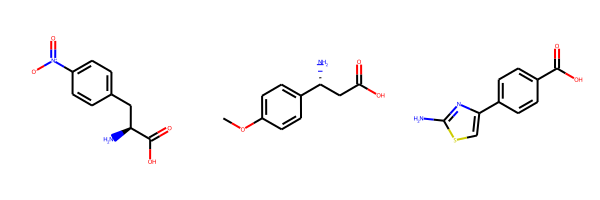

In [29]:
Draw.MolsToGridImage(amines[:3])

1513


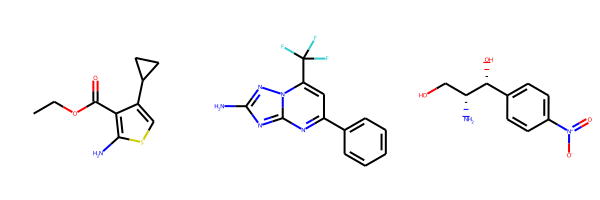

In [30]:
amines = [m for m in amines if not fgs['CarboxylicAcid'].HasMatch(m) and not fgs['AcidChloride'].HasMatch(m)]
print(len(amines))
Draw.MolsToGridImage(amines[:3])

In [31]:
acids = [m for m in bbs if fgs['CarboxylicAcid.Aromatic'].HasMatch(m)] + [m for m in bbs if fgs['AcidChloride.Aromatic'].HasMatch(m)]
acids = [m for m in acids if not fgs['Amine'].HasMatch(m)]
len(acids)

697

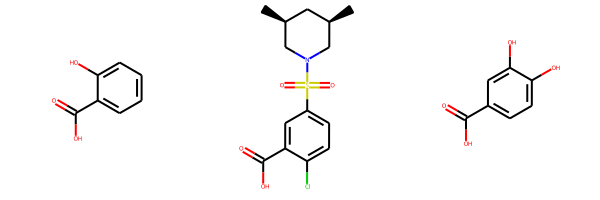

In [32]:
Draw.MolsToGridImage(acids[:3])

It's also possible to filter molecules using simple SMILES or SMARTS matching:

1


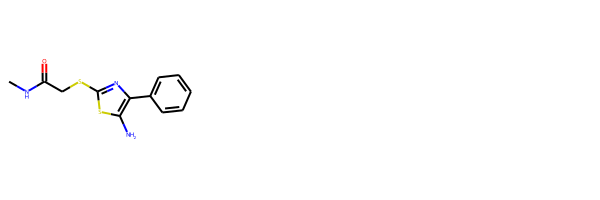

In [33]:
qry = Chem.MolFromSmiles('Nc1scnc1')
tmp = [m for m in amines if m.HasSubstructMatch(qry)]
print(len(tmp))
Draw.MolsToGridImage(tmp[:3])

41


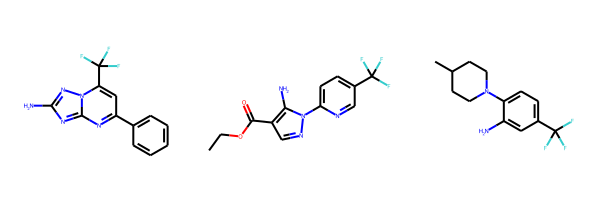

In [34]:
qry = Chem.MolFromSmarts('cC(F)(F)F')
tmp = [m for m in amines if m.HasSubstructMatch(qry)]
print(len(tmp))
Draw.MolsToGridImage(tmp[:3])

# Chemical reactions

## Transformations

### Modeling real reactions

In [35]:
from rdkit.Chem import rdChemReactions

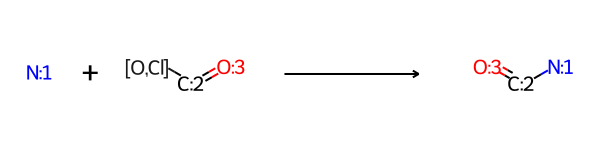

In [36]:
reaction = rdChemReactions.ReactionFromSmarts('[NH2:1].[C:2](=[O:3])-[O,Cl]>>[N:1]-[C:2]=[O:3]')
reaction

In [37]:
ps = reaction.RunReactants((amines[0],acids[0]))
ps

((<rdkit.Chem.rdchem.Mol at 0x7fb5218dc190>,),)

Products of reactions are not sanitized, so we need to take care of that:

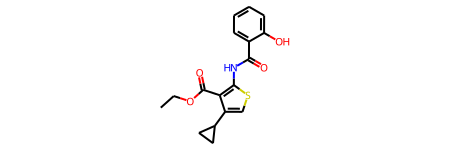

In [38]:
prod = ps[0][0]
Chem.SanitizeMol(prod)
prod

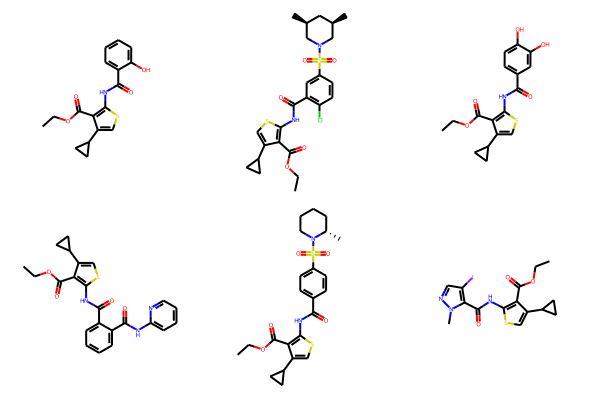

In [39]:
import itertools
all_pairs = itertools.product(amines,acids)
mols = []
for a,b in all_pairs:
    prods = reaction.RunReactants((a,b))
    if not prods:
        continue
    prod = prods[0][0]
    Chem.SanitizeMol(prod)
    mols.append(prod)
    if len(mols)>=100:
        break
Draw.MolsToGridImage(mols[:6])

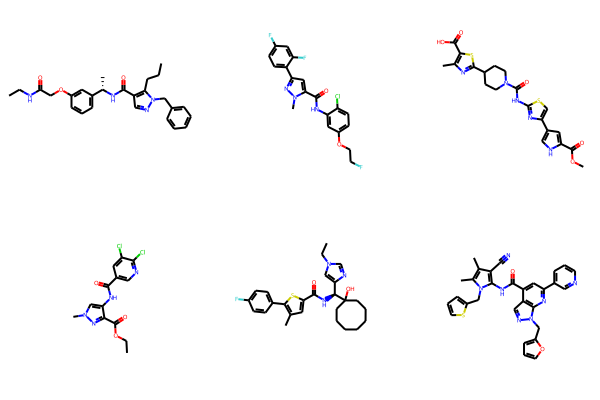

In [40]:
import itertools,random
all_pairs = list(itertools.product(range(len(amines)),range(len(acids))))
random.seed(0xf00d)
random.shuffle(all_pairs)
mols = []
for a,b in all_pairs:
    prods = reaction.RunReactants((amines[a],acids[b]))
    if not prods:
        continue
    prod = prods[0][0]
    Chem.SanitizeMol(prod)
    mols.append(prod)
    if len(mols)>=100:
        break
Draw.MolsToGridImage(mols[:6])

### Doing pseudo-chemistry: attaching molecules to templates

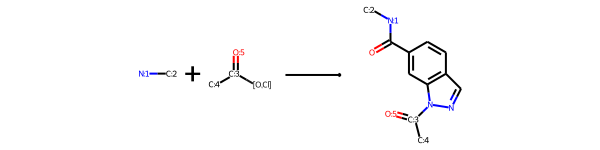

In [41]:
reaction2 = rdChemReactions.ReactionFromRxnFile('./data/pseudo_chemistry.rxn')
reaction2

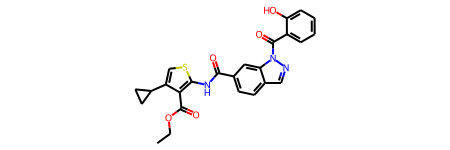

In [42]:
ps = reaction2.RunReactants((amines[0],acids[0]))
prod = ps[0][0]
Chem.SanitizeMol(prod)
prod

## Working with actual reactions

I'm using the SI from this paper:

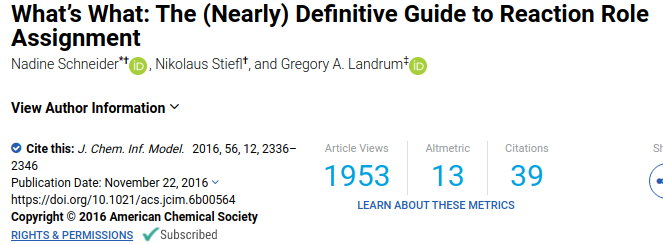

https://doi.org/10.1021/acs.jcim.6b00564

In [43]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data/ci6b00564_si_datasetA.csv.gz')
df.head()

,rxn_Class,patentID,rxn_Smiles,reactantSet
0,1,US07678803B2,[H-].[CH3:1][c:2]1[cH:3][nH:4][c:5]2[c:6]1[C:7...,"set([1, 3])"
1,10,US07071180B2,CC(=O)O.[cH:5]1[cH:4][n:3][c:2]([c:7]([n:6]1)[...,"set([1, 6])"
2,1,US20130079342A1,CC(C)(C)[O-].CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CC...,"set([5, 13])"
3,2,US20140171403A1,[cH:25]1[c:24]([cH:31][c:29]([cH:28][c:26]1[Cl...,"set([0, 1])"
4,9,US07285563B2,CCCC[N+](CCCC)(CCCC)CCCC.CN(C)C=O.[cH:5]1[cH:6...,"set([2, 5])"


In [44]:
smis = df.rxn_Smiles.to_list()
smis[:3]

['[H-].[CH3:1][c:2]1[cH:3][nH:4][c:5]2[c:6]1[C:7](=[O:8])[CH2:9][C:10]([CH2:13]2)([CH3:11])[CH3:12].CN(C)C=O.[cH:23]1[cH:24][c:25]2[c:20]([cH:21][c:22]1F)[c:18]([cH:17][n:16][c:15]2[NH2:14])[Br:19].[NH4+].[Na+].[Cl-]>>[CH3:1][c:2]1[cH:3][n:4]([c:5]2[c:6]1[C:7](=[O:8])[CH2:9][C:10]([CH2:13]2)([CH3:11])[CH3:12])[c:22]3[cH:23][cH:24][c:25]4[c:20]([cH:21]3)[c:18]([cH:17][n:16][c:15]4[NH2:14])[Br:19]',
 'CC(=O)O.[cH:5]1[cH:4][n:3][c:2]([c:7]([n:6]1)[N:8]2[CH2:9][CH2:10][NH:11][CH2:12][CH2:13]2)[Cl:1].C(=O)([O-])[O-].O.[Na+].[Na+].Br[Br:13]>>[cH:5]1[c:4]([n:3][c:2]([c:7]([n:6]1)[N:8]2[CH2:9][CH2:10][NH:11][CH2:12][CH2:13]2)[Cl:1])[Br:13]',
 'CC(C)(C)[O-].CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2)c(C(C)C)c1.CC(C)c1ccc(-c2ccccc2)c(C(C)C)c1C(C)C.CCO.Cc1ccccc1.Cl[c:7]1[c:2]([CH3:1])[c:3](-[c:13]2[n:14][cH:15][cH:16][cH:17][cH:18]2)[n:4][c:5]2[c:6]1[c:8]([F:12])[cH:9][cH:10][cH:11]2.O.O=C(/C=C/c1ccccc1)/C=C/c1ccccc1.O=C(/C=C/c1ccccc1)/C=C/c1ccccc1.O=C(/C=C/c1ccccc1)/C=C/c1ccccc1.[Na+].[Pd].[

In [45]:
smis = []
smis_no_agents = []
for smi,ris in zip(df.rxn_Smiles,df.reactantSet):
    ris = [int(x) for x in ris.replace('set([','').replace('])','').split(',')]
    trs,prods = smi.split('>>')
    trs = np.array(trs.split('.'))
    indices = np.zeros(len(trs),bool)
    for ri in ris:
        indices[ri]=1
    reacts = trs[indices]
    agents = trs[~indices]
    smi = f"{'.'.join(reacts)}>{'.'.join(agents)}>{prods}"
    smis.append(smi)
    smi = f"{'.'.join(reacts)}>>{prods}"
    smis_no_agents.append(smi)

In [46]:
smis[0]

'[CH3:1][c:2]1[cH:3][nH:4][c:5]2[c:6]1[C:7](=[O:8])[CH2:9][C:10]([CH2:13]2)([CH3:11])[CH3:12].[cH:23]1[cH:24][c:25]2[c:20]([cH:21][c:22]1F)[c:18]([cH:17][n:16][c:15]2[NH2:14])[Br:19]>[H-].CN(C)C=O.[NH4+].[Na+].[Cl-]>[CH3:1][c:2]1[cH:3][n:4]([c:5]2[c:6]1[C:7](=[O:8])[CH2:9][C:10]([CH2:13]2)([CH3:11])[CH3:12])[c:22]3[cH:23][cH:24][c:25]4[c:20]([cH:21]3)[c:18]([cH:17][n:16][c:15]4[NH2:14])[Br:19]'

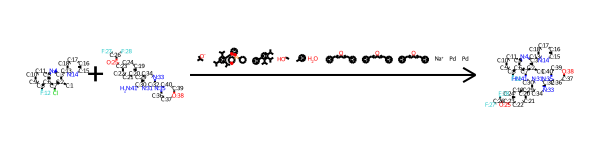

In [47]:
rxn = rdChemReactions.ReactionFromSmarts(smis[2],useSmiles=True)
rxn

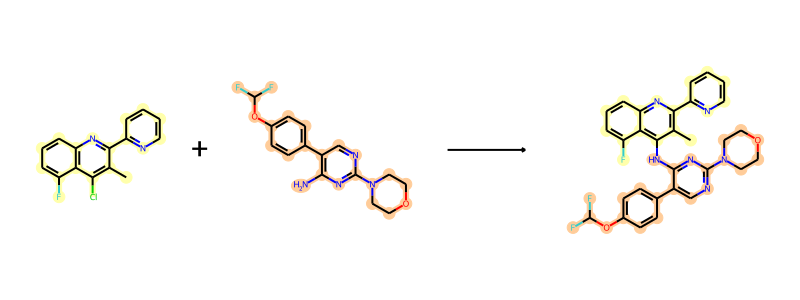

In [48]:
IPythonConsole.highlightByReactant = True
IPythonConsole.molSize=600,300
rxn = rdChemReactions.ReactionFromSmarts(smis_no_agents[2],useSmiles=True)
rxn

Looking at the reactions can really help identify problems:

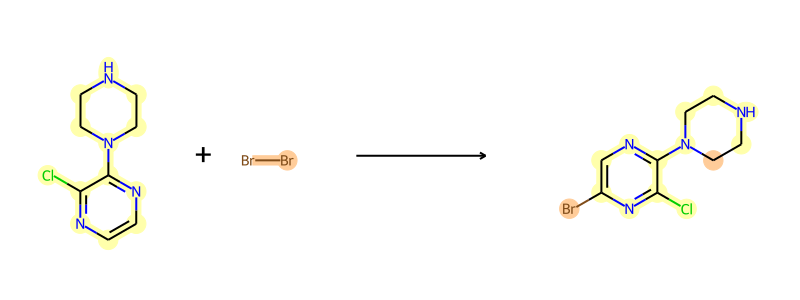

In [49]:
rdChemReactions.ReactionFromSmarts(smis_no_agents[1],useSmiles=True)

In [50]:
smis_no_agents[1]

'[cH:5]1[cH:4][n:3][c:2]([c:7]([n:6]1)[N:8]2[CH2:9][CH2:10][NH:11][CH2:12][CH2:13]2)[Cl:1].Br[Br:13]>>[cH:5]1[c:4]([n:3][c:2]([c:7]([n:6]1)[N:8]2[CH2:9][CH2:10][NH:11][CH2:12][CH2:13]2)[Cl:1])[Br:13]'

Let's look at what's changing in the reaction

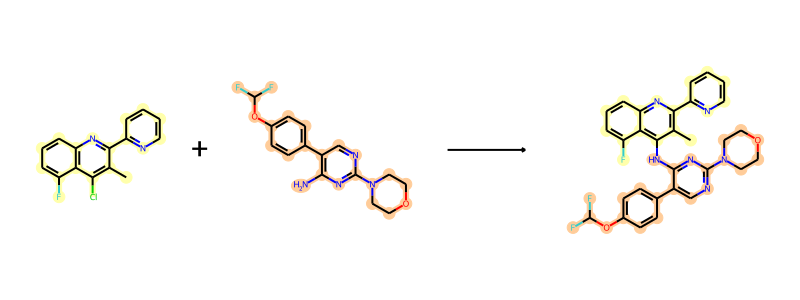

In [51]:
rxn = rdChemReactions.ReactionFromSmarts(smis_no_agents[2],useSmiles=True)
rxn

In [52]:
rxn.Initialize()
rxn.GetReactingAtoms()

((0, 1), (4,))

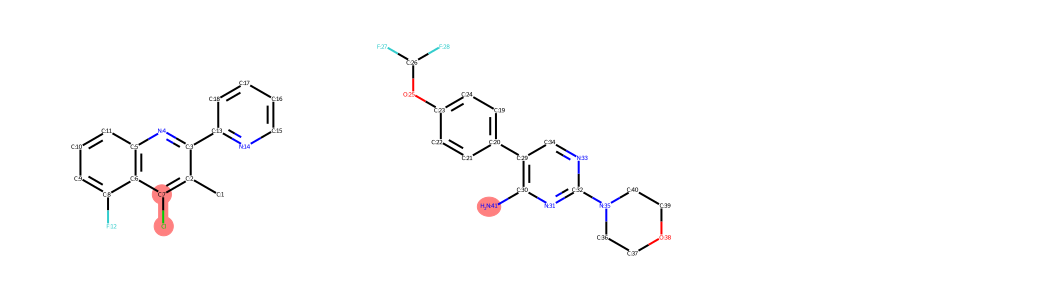

In [53]:
reacts = []
for react in rxn.GetReactants():
    react = Chem.Mol(react)
    Chem.SanitizeMol(react)
    reacts.append(react)
    
Draw.MolsToGridImage(reacts,subImgSize=(350,300),highlightAtomLists=rxn.GetReactingAtoms())

In [54]:
from ipywidgets import interact,fixed
@interact(smis=fixed(smis_no_agents),idx=range(len(smis_no_agents)))
def show_rxn(idx,smis):
    rxn = rdChemReactions.ReactionFromSmarts(smis[idx],useSmiles=True)
    rxn.Initialize()
    if not rxn:
        return None
    reacts = []
    for react in rxn.GetReactants():
        react = Chem.Mol(react)
        Chem.SanitizeMol(react)
        reacts.append(react)
    return Draw.MolsToGridImage(reacts,subImgSize=(350,300),highlightAtomLists=rxn.GetReactingAtoms())

interactive(children=(Dropdown(description='idx', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…

### Bonus advanced content

Highlighting the bonds which change in a reaction

In [55]:
from collections import namedtuple
AtomInfo = namedtuple('AtomInfo',('mapnum','reactant','reactantAtom','product','productAtom'))
def map_reacting_atoms_to_products(rxn,reactingAtoms):
    res = []
    for ridx,reacting in enumerate(reactingAtoms):
        reactant = rxn.GetReactantTemplate(ridx)
        for raidx in reacting:
            mapnum = reactant.GetAtomWithIdx(raidx).GetAtomMapNum()
            foundit=False
            for pidx,product in enumerate(rxn.GetProducts()):
                for paidx,patom in enumerate(product.GetAtoms()):
                    if patom.GetAtomMapNum()==mapnum:
                        res.append(AtomInfo(mapnum,ridx,raidx,pidx,paidx))
                        foundit = True
                        break
                    if foundit:
                        break
    return res
def get_mapped_neighbors(atom):
    res = {}
    amap = atom.GetAtomMapNum()
    if not amap:
        return res
    for nbr in atom.GetNeighbors():
        nmap = nbr.GetAtomMapNum()
        if nmap:
            if amap>nmap:
                res[(nmap,amap)] = (atom.GetIdx(),nbr.GetIdx())
            else:
                res[(amap,nmap)] = (nbr.GetIdx(),atom.GetIdx())
    return res

BondInfo = namedtuple('BondInfo',('product','productAtoms','productBond','status'))
def find_modified_bonds_in_products(rxn):
    rxn.Initialize()
    reactingAtoms = rxn.GetReactingAtoms()
    amap = map_reacting_atoms_to_products(rxn,reactingAtoms)
    res = []
    seen = set()
    for _,ridx,raidx,pidx,paidx in amap:
        reactant = rxn.GetReactantTemplate(ridx)
        ratom = reactant.GetAtomWithIdx(raidx)
        product = rxn.GetProductTemplate(pidx)
        patom = product.GetAtomWithIdx(paidx)

        rnbrs = get_mapped_neighbors(ratom)
        pnbrs = get_mapped_neighbors(patom)
        for tpl in pnbrs:
            pbond = product.GetBondBetweenAtoms(*pnbrs[tpl])
            if (pidx,pbond.GetIdx()) in seen:
                continue
            seen.add((pidx,pbond.GetIdx()))
            if not tpl in rnbrs:
                # new bond in product
                res.append(BondInfo(pidx,pnbrs[tpl],pbond.GetIdx(),'New'))
            else:
                # present in both reactants and products, check to see if it changed
                rbond = reactant.GetBondBetweenAtoms(*rnbrs[tpl])
                if rbond.GetBondType()!=pbond.GetBondType():
                    res.append(BondInfo(pidx,pnbrs[tpl],pbond.GetIdx(),'Changed'))
    return res


from IPython.display import Image
def draw_product_with_modified_bonds(rxn,pidx,bnds,showAtomMaps=False):
    d2d = Draw.rdMolDraw2D.MolDraw2DCairo(350,300)
    pmol = Chem.Mol(rxn.GetProductTemplate(pidx))
    Chem.SanitizeMol(pmol)
    if not showAtomMaps:
        for atom in pmol.GetAtoms():
            atom.SetAtomMapNum(0)
    bonds_to_highlight=[]
    highlight_bond_colors={}
    atoms_to_highlight=set()
    for binfo in bnds:
        if binfo.product==pidx and binfo.status=='New':
            bonds_to_highlight.append(binfo.productBond)
            highlight_bond_colors[binfo.productBond] = (1,.4,.4)
        if binfo.product==pidx and binfo.status=='Changed':
            bonds_to_highlight.append(binfo.productBond)
            highlight_bond_colors[binfo.productBond] = (.4,.4,1)
    d2d.drawOptions().useBWAtomPalette()
    d2d.DrawMolecule(pmol,highlightAtoms=atoms_to_highlight,highlightBonds=bonds_to_highlight,
                     highlightBondColors=highlight_bond_colors)
    d2d.FinishDrawing()
    return d2d.GetDrawingText()



In [56]:
rxn.Initialize()
bnds = find_modified_bonds_in_products(rxn)
bnds

[BondInfo(product=0, productAtoms=(13, 12), productBond=12, status='New')]

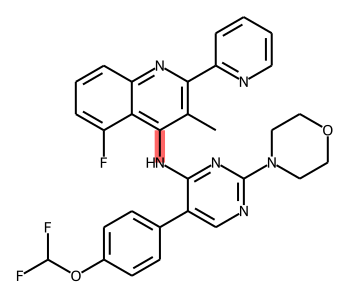

In [57]:
Image(draw_product_with_modified_bonds(rxn,0,bnds))

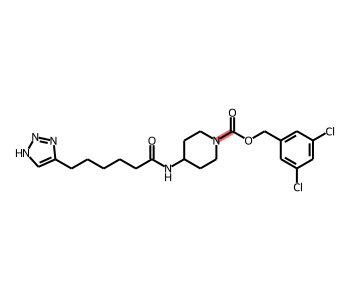

In [58]:
rxn = rdChemReactions.ReactionFromSmarts(smis_no_agents[3],useSmiles=True)
bnds = find_modified_bonds_in_products(rxn)
Image(draw_product_with_modified_bonds(rxn,0,bnds))

In [59]:
from ipywidgets import interact,fixed
@interact(smis=fixed(smis_no_agents),idx=range(len(smis_no_agents)))
def show_rxn(idx,smis):
    rxn = rdChemReactions.ReactionFromSmarts(smis[idx],useSmiles=True)
    if not rxn:
        return None
    bnds = find_modified_bonds_in_products(rxn)
    return Image(draw_product_with_modified_bonds(rxn,0,bnds))

interactive(children=(Dropdown(description='idx', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…

In [60]:
from ipywidgets import interact,fixed
@interact(smis=fixed(smis_no_agents),idx=range(len(smis_no_agents)))
def show_rxn(idx,smis):
    rxn = rdChemReactions.ReactionFromSmarts(smis[idx],useSmiles=True)
    if not rxn:
        return None
    return Image(IPythonConsole._toReactionPNG(rxn))

interactive(children=(Dropdown(description='idx', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…